<a href="https://colab.research.google.com/github/patricksabry/UTS_ML2019_ID98106545/blob/master/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 Take Home Exam

##Question 3:

**Marketing or advertising companies would be very interested in being able to
predict whether a Twitter message will spread as a meme or not, and even better,
construct it so that it will spread. Why is this a hard problem to solve? Describe two
approaches using data analytics to predict whether a tweet will go viral or not. How
would you validate these approaches? Discuss the ethical and social consequence
of this study.**

# Introduction

What truly constitutes a meme? 
The enormous popularity and pervasive use of social network has given rise to a new age of online media hyperconsumption in the form of text, images and videos. Large scale social media platforms such as twitter have become formidable mediums for effortless wide scale information propagation. Any user can choose to share their opinion on a product or post a humerous picture with the chance of it becoming a viral sensation on twitter. It is however that very definition of virality that is so difficult to qualify and break down into concrete quantitative attributes. A meme was first defined as a unit of cultural transmission (Dawkins, 1976). Accordingly, the success of a meme in respect to virality is arguably contingent on a plethora of sociocultural and geo-political factors at a given time. Memes tend to provide an opinionated commentary on the state of current affairs and the flaws of the human condition, typically formed on the tenants of humour and self-deprication. It is thus hard to quantify an object which is inherently so dynamic and subjective when approaching this topic from a data analytics perspective. This research paper serves to explore possible solutions to predicting meme virality, as well as delve deeper into the socio-ethical implications of building such predictive systems.

# Approach 1 -  Scalable Virality Prediction Using Gradient Boosted Tree Algorithm and Spark


Kowalczyk and Larsen of the Microsoft Development Center proposed an interesting solution to privacy-compliant virality prediction using a Gradient Boosted Tree (GBT) based algorithm. This approach leverages a mixture of content, temporal and sentiment based features extracted via the Twitter API to efficiently generate predictions at scale. The solution boasts an intricate distributed data processing framework which pipelines the solution into three distinct steps; data ingestion, feature extraction and finally model fitting.




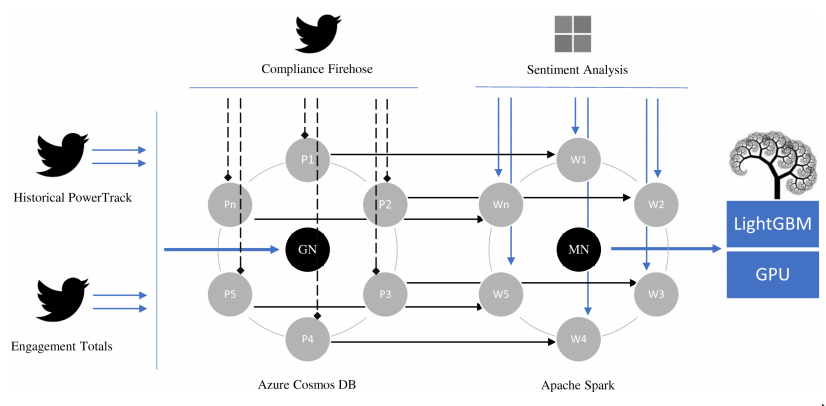

Figure 1 - Solution Overview Diagram of GBT based Twitter virality prediction system. (D. K. Kowalczyk, J. Larsen. 2019)


### Data Ingestion
Data privacy compliance is imperative when dealing with big social data. Stringent regulations such as the General Data Protection Regulation (GDPR, 2018) in Europe dictate how certain features are collected and more importantly how these features are represented in an analytical model. This solution addresses privacy concerns by integrating Twitter's Compliance Firehose API into its data ingestion process. The Firehose API allows for the cleaning and abstraction of large volumes of Twitter stream data based on user requests on the Twitter platform itself. If a user desires to delete a tweet on the Twitter platform, that deletion request is automatically cascaded to this project's datastore and is deleted from the dataset too. Furthermore, the Twitter Engagement Totals API is also called during data collection, which automatically retrieves all of the retweets and favourites ever registered against a particular tweet. This API facilitates the efficient collection of unique content and thus reduces the document volume for the task by half (D.K Kowalczyk, J.Larsen. 2019) in the interest of space and time complexity at scale. Subsequently, this stream data is indexed into partitions in a distributed Azure data store for further pre-processing.

### Sentiment Analysis

Sentiment analysis is arguably the crux of the problem domain when it comes to predicting virality of user content on social media. This particular implementation leveraged the Text Analytics API from Microsoft Cognitive Services. The API houses a pre-trained algorithm which returns a continuous value sentiment score between 0 and 1 for each document in a given corpus, where 1 is most positive and 0 is most negative. This API is a paid off-the-shelf service, and thus raises concerns about reproducibility and flexibility in feature engineering.

### Modeling
Despite Deep neural networks having proven advantages for feature extraction and inference in high dimensionality unstructured data (Samek, W., Wiegand, T., M¨uller, K.R. 2017), such networks inherently have a low explainability of results due to the ambiguities of their internal representations (Hinton et al., 1985). This is why the lightGBM implementation of the GBT algorithm was used in this application, providing explainable, scalable GPU accelerated training of an ensembled regression tree-based model. Using Apache spark, the final feature space is aggregated from distributed slave nodes by the master node for fitting and evaluation on a parallel GPU implementation. A loss function is subsequently minimised in respect to an RMSE error measure in order to penalize large errors more aggresively.

### Evaluation
This system was validated on the MBI, T2015 and T2016 datasets consisting of millions of unique tweets. The main metric used to compare the results of the GBT model to previous state-of-the-art models is the Spearman Rank correlation coefficient. This coefficient assesses the similraity between two rank values as a continuous value between -1 (negative correlation) and 1 (positive correlation). Alongside the SpearmanR measure, $R^{2}$ and RMSE error measures were also used to measure the difference between the expected popularity of a tweet and the model's prediction. Kowalczyk & Larsen's GBT model outperformed the other state-of-the-art models by more than 37% across all of the aforementioned datasets (D. K. Kowalczyk, J. Larsen. 2019).

# Ethical and Social Implications

# Conclusion

# References

* http://www.scielo.org.co/pdf/cesp/v6n2/v6n2a07.pdf
* file:///C:/Users/patri/Desktop/8035-37750-1-PB.pdf
* http://ceur-ws.org/Vol-2328/1_paper_27.pdf
* http://arxiv.org/abs/1708.08296
* https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/overview



# Draft area (Research notes)
